In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [142]:
fin = r'data\FuryWilderFightHistory.xlsx'
df = (pd.read_excel(fin)
      .assign(date=lambda x: pd.to_datetime(x.date, format='%A %d, %B %Y'),
              win=lambda x: (x.winner == x.name) * 1,
              loss=lambda x:  ((x.winner != x.name) & (~x.winner.isna())) * 1,
              draw=lambda x: x.winner.isna() * 1,
              ruling=lambda x: x.opponent_ruling.str.split(expand=True)[0],
              ending_round=lambda x: x.opponent_ruling.str.split(expand=True)[2].fillna(12).astype(int)
             )
      .drop(['opponent_last 6'], axis=1)
     )

In [140]:
df.head()

,name,fight_id,opponent_name,opponent_ranking,opponent_before fight,opponent_after fight,opponent_age,opponent_stance,opponent_height,opponent_reach,opponent_won,opponent_lost,opponent_drawn,opponent_KOs,opponent_ruling,opponent_result,winner,date,url,opponent_last 6,win,loss,draw,ruling,ending_round
0,Tyson Fury,2424982,Deontay Wilder,5.0,756.3 points,481.3 points,34.0,orthodox,6′ 7″ / 201cm,83″ / 211cm,42,0,1,41,TKO round 7,loss,Tyson Fury,2020-02-22,https://boxrec.com/en/event/798948/2424982,NaN,1,0,0,TKO,7
1,Tyson Fury,2380608,Otto Wallin,59.0,42.80 points,42.80 points,28.0,southpaw,6′ 5½″ / 197cm,78″ / 198cm,20,0,0,13,UD round 12,loss,Tyson Fury,2019-09-14,https://boxrec.com/en/event/793512/2380608,NaN,1,0,0,UD,12
2,Tyson Fury,2335845,Tom Schwarz,60.0,27.80 points,27.80 points,25.0,orthodox,6′ 5½″ / 197cm,NaN,24,0,0,16,TKO round 2,loss,Tyson Fury,2019-06-15,https://boxrec.com/en/event/784993/2335845,NaN,1,0,0,TKO,2
3,Tyson Fury,2281110,Deontay Wilder,5.0,635.7 points,557.7 points,33.0,orthodox,6′ 7″ / 201cm,83″ / 211cm,40,0,0,39,SD,draw,NaN,2018-12-01,https://boxrec.com/en/event/775415/2281110,NaN,0,0,1,SD,12
4,Tyson Fury,2256926,Francesco Pianeta,NaN,23.44 points,23.44 points,33.0,southpaw,6′ 5″ / 196cm,80″ / 203cm,35,4,1,21,PTS round 10,loss,Tyson Fury,2018-08-18,https://boxrec.com/en/event/769039/2256926,NaN,1,0,0,PTS,10


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   75 non-null     object        
 1   fight_id               75 non-null     int64         
 2   opponent_name          75 non-null     object        
 3   opponent_ranking       27 non-null     float64       
 4   opponent_before fight  75 non-null     object        
 5   opponent_after fight   75 non-null     object        
 6   opponent_age           74 non-null     float64       
 7   opponent_stance        65 non-null     object        
 8   opponent_height        65 non-null     object        
 9   opponent_reach         34 non-null     object        
 10  opponent_won           75 non-null     int64         
 11  opponent_lost          75 non-null     int64         
 12  opponent_drawn         75 non-null     int64         
 13  opponen

In [128]:
""" Summary Statistics """
(df.groupby(['name']).agg(
    min_date=pd.NamedAgg(column='date', aggfunc='min'),
    max_date=pd.NamedAgg(column='date', aggfunc='max'),
    total_fights=pd.NamedAgg(column='name', aggfunc='count'),
    wins=pd.NamedAgg(column='win', aggfunc='sum'),
    losses=pd.NamedAgg(column='loss', aggfunc='sum'),
    draws=pd.NamedAgg(column='draw', aggfunc='sum'),
    average_ending_round=pd.NamedAgg(column='ending_round', aggfunc='mean'),
    average_opponent_ranking=pd.NamedAgg(column='opponent_ranking', aggfunc='mean'),
    average_opponent_wins=pd.NamedAgg(column='opponent_won', aggfunc='mean'),
    average_opponent_losses=pd.NamedAgg(column='opponent_lost', aggfunc='mean'),
    average_opponent_draws=pd.NamedAgg(column='opponent_drawn', aggfunc='mean'),
    average_opponent_kos=pd.NamedAgg(column='opponent_KOs', aggfunc='mean'),
 )
 .assign(
     min_date=lambda x: x.min_date.dt.strftime('%A %d, %B %Y'),
     max_date=lambda x: x.max_date.dt.strftime('%A %d, %B %Y'),
     average_ending_round=lambda x: x.average_ending_round.round(2),
     average_opponent_kos=lambda x: x.average_opponent_kos.round(2),
 )
 .rename(columns={
     'min_date': 'First Professional Fight',
     'max_date': 'Most Recent Professional Fight',
     'total_fights': 'Total Fights',
     'wins': 'Wins',
     'losses': 'Losses',
     'draws': 'Draws',
     'average_ending_round': 'Average Ending Round',
     'average_opponent_ranking': 'Average Opponent\'s Ranking',
     'average_opponent_wins': 'Average Opponent\'s Number of Wins',
     'average_opponent_losses': 'Average Opponent\'s Number of Losses',
     'average_opponent_draws': 'Average Opponent\'s Number of Draws',
     'average_opponent_kos': 'Average Opponent\'s Total KOs',
 })
 .T
)

name,Deontay Wilder,Tyson Fury
First Professional Fight,"Saturday 15, November 2008","Saturday 06, December 2008"
Most Recent Professional Fight,"Saturday 22, February 2020","Saturday 22, February 2020"
Total Fights,44,31
Wins,42,30
Losses,1,0
Draws,1,1
Average Ending Round,3.41,6.23
Average Opponent's Ranking,155.286,136
Average Opponent's Number of Wins,17.3636,21.6129
Average Opponent's Number of Losses,5.13636,5.83871


### Notes

* Both started at almost exactly the same time
* Wilder has fought more
* The only loss between them was when Fury beat Wilder in February
* Wilder finishes opponents in almost half the time
* Fury opponents are slightly better than Wilders (more wins and average lower ranked)

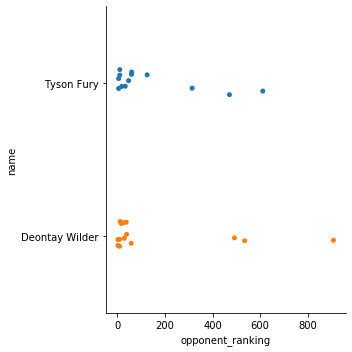

In [31]:
sns.catplot(x='opponent_ranking', y='name', data=df)

In [156]:
columns = ['name', 'opponent_name', 'date', 'opponent_ranking']
by = ['name', 'date']
(df.loc[:, columns]
 .sort_values(by)
 .assign(opponent_ranking=lambda x: x.opponent_ranking.apply(lambda rank: int(rank) if rank == rank else 'Not Ranked'))
)

,name,opponent_name,date,opponent_ranking
74,Deontay Wilder,Ethan Cox,2008-11-15,Not Ranked
73,Deontay Wilder,Shannon Gray,2009-03-06,Not Ranked
72,Deontay Wilder,Richard Greene Jr,2009-03-14,Not Ranked
71,Deontay Wilder,Joseph Rabotte,2009-04-24,Not Ranked
70,Deontay Wilder,Charles Brown,2009-05-23,Not Ranked
...,...,...,...,...
4,Tyson Fury,Francesco Pianeta,2018-08-18,Not Ranked
3,Tyson Fury,Deontay Wilder,2018-12-01,5
2,Tyson Fury,Tom Schwarz,2019-06-15,60
1,Tyson Fury,Otto Wallin,2019-09-14,59


In [145]:
mask = df.opponent_ranking > 200
columns = ['name', 'opponent_name', 'date', 'opponent_ranking']
by = ['name', 'date']
(df.loc[mask, columns].sort_values(by)
 .assign(opponent_ranking=lambda x: x.opponent_ranking.astype('int'))
)

,name,opponent_name,date,opponent_ranking
64,Deontay Wilder,Dustin Nichols,2010-07-03,908
56,Deontay Wilder,Daniel Cota,2011-11-05,535
48,Deontay Wilder,Matthew Greer,2013-01-19,492
25,Tyson Fury,Scott Belshaw,2009-05-23,471
22,Tyson Fury,Tomas Mrazek,2009-09-26,611
17,Tyson Fury,Marcelo Nascimento,2011-02-19,314


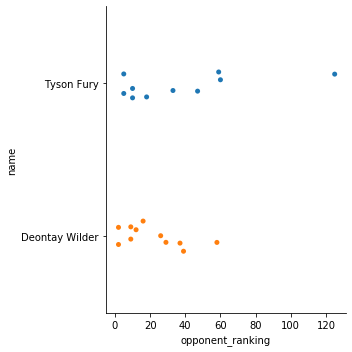

In [146]:
sns.catplot(x='opponent_ranking', y='name', data=df.loc[~mask, ])

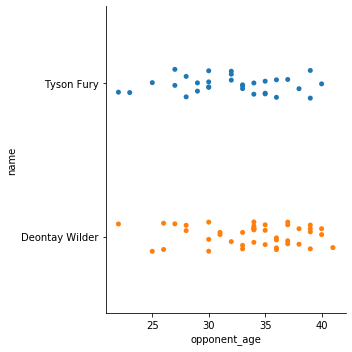

In [32]:
sns.catplot(x='opponent_age', y='name', data=df)

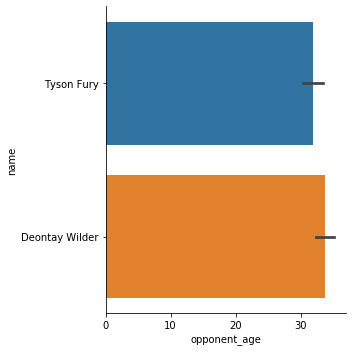

In [33]:
sns.catplot(x="opponent_age", y="name", kind="bar", data=df)